In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
loan_data = pd.read_csv('application_train.csv')

In [3]:
loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
jumlah_gagal_bayar = loan_data[loan_data['TARGET'] == 1].shape[0]
jumlah_berhasil_bayar = loan_data[loan_data['TARGET'] == 0].shape[0]

total_data = loan_data.shape[0]

persentase_gagal_bayar = (jumlah_gagal_bayar / total_data) * 100

persentase_berhasil_bayar = (jumlah_berhasil_bayar / total_data) * 100

ldp = persentase_gagal_bayar / 100

print("Persentase Gagal Bayar (TARGET = 1):", persentase_gagal_bayar, "%")
print("Persentase Berhasil Bayar (TARGET = 0):", persentase_berhasil_bayar, "%")
print("Loss Disbursement Probability (LDP):", ldp)

Persentase Gagal Bayar (TARGET = 1): 8.072881945686495 %
Persentase Berhasil Bayar (TARGET = 0): 91.92711805431351 %
Loss Disbursement Probability (LDP): 0.08072881945686496


Persentase Gagal Bayar (TARGET = 1): 8.07%
Persentase Berhasil Bayar (TARGET = 0): 91.93%


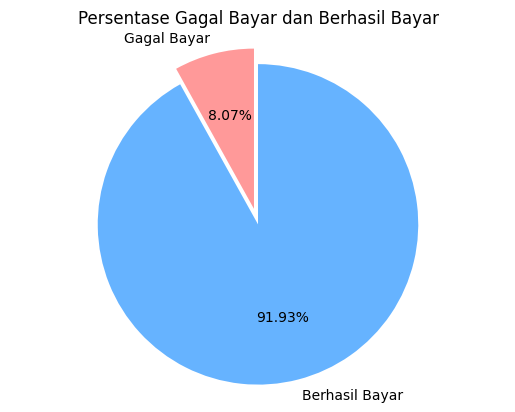

In [5]:
target_counts = loan_data['TARGET'].value_counts()
failed_payments = target_counts[1]
successful_payments = target_counts[0]

failed_percentage = (failed_payments / len(loan_data)) * 100
successful_percentage = (successful_payments / len(loan_data)) * 100

print("Persentase Gagal Bayar (TARGET = 1): {:.2f}%".format(failed_percentage))
print("Persentase Berhasil Bayar (TARGET = 0): {:.2f}%".format(successful_percentage))

labels = ['Gagal Bayar', 'Berhasil Bayar']
sizes = [failed_percentage, successful_percentage]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title('Persentase Gagal Bayar dan Berhasil Bayar')
plt.show()

# Missing

In [6]:
missing_values = loan_data.isnull().sum()

In [7]:
threshold = len(loan_data) * 0.5

In [8]:
columns_to_drop = missing_values[missing_values > threshold].index

In [9]:
data_dropped = loan_data.drop(columns=columns_to_drop)

In [10]:
data = data_dropped

# Cleaning

In [11]:
kolom_numerik_gabungan = [ 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE']

In [12]:
kolom_non_numerik = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE']

In [13]:
data = data.drop('SK_ID_CURR', axis =1)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoder = LabelEncoder()

for kolom in kolom_non_numerik:
    data[kolom] = label_encoder.fit_transform(data[kolom])

print(data.head())

   TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   0            1             0                1   
1       0                   0            0             0                0   
2       0                   1            1             1                1   
3       0                   0            0             0                1   
4       0                   0            1             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
min_max_scaler = MinMaxScaler()

In [18]:
data_scaled = min_max_scaler.fit_transform(data[kolom_numerik_gabungan])

In [19]:
data_scaled = pd.DataFrame(data_scaled, columns=kolom_numerik_gabungan)

In [20]:
print(data_scaled.head())

   TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0     1.0           0.0          0.001512    0.090287     0.090032   
1     0.0           0.0          0.002089    0.311736     0.132924   
2     0.0           0.0          0.000358    0.022472     0.020025   
3     0.0           0.0          0.000935    0.066837     0.109477   
4     0.0           0.0          0.000819    0.116854     0.078975   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         0.077441                    0.256321    0.888839       0.045086   
1         0.271605                    0.045016    0.477114       0.043648   
2         0.023569                    0.134897    0.348534       0.046161   
3         0.063973                    0.107023    0.350846       0.038817   
4         0.117845                    0.392880    0.298591       0.038820   

   DAYS_REGISTRATION  ...  FLAG_OWN_REALTY  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
0           0.852140  ...          

In [21]:
data = data.fillna(data.median())

In [22]:
data.update(data_scaled)
data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1.0,0.0,0.5,0.0,1.0,0.0,0.001512,0.090287,0.090032,0.077441,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04
1,0.0,0.0,0.0,0.0,0.0,0.0,0.002089,0.311736,0.132924,0.271605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,0.0,1.0,0.5,1.0,1.0,0.0,0.000358,0.022472,0.020025,0.023569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.0,0.0,0.0,0.0,1.0,0.0,0.000935,0.066837,0.109477,0.063973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00
4,0.0,0.0,0.5,0.0,1.0,0.0,0.000819,0.116854,0.078975,0.117845,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


# Feature Engineering

In [23]:
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['TARGET'].abs().sort_values(ascending=False)

In [25]:
correlation_with_target.head(50)

TARGET                         1.000000
EXT_SOURCE_2                   0.160296
EXT_SOURCE_3                   0.158601
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
NAME_EDUCATION_TYPE            0.054699
CODE_GENDER                    0.054692
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
NAME_INCOME_TYPE               0.046829
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
EMERGENCYSTATE_MODE            0.041955
FLOORSMAX_AVG                  0.039385
FLOORSMAX_MEDI                 0.039157
FLOORSMAX_MODE                 0.038377
REGION_POPULATION_RELATIVE     0.037227
AMT_REQ_CREDIT_BUREAU_YEAR     0.035980
NAME_HOUSING_TYPE              0.034489
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032394


In [26]:
relevant_features = correlation_with_target[correlation_with_target > 0.02].index

In [27]:
subset_data = data[relevant_features]

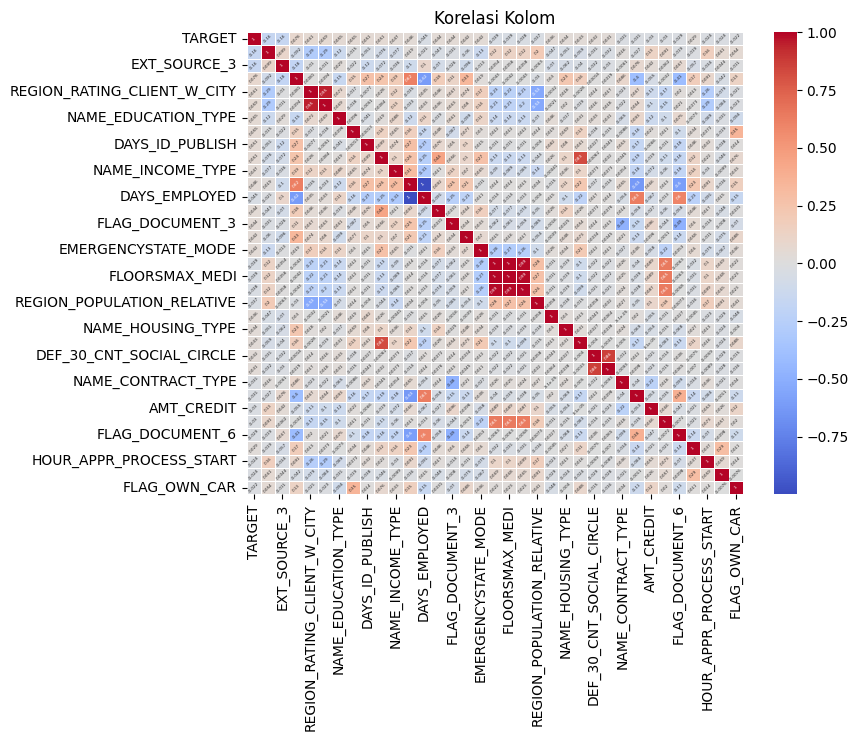

In [29]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(subset_data.corr(), annot=True, cmap='coolwarm', annot_kws={"rotation": 45, "fontsize": 3}, linewidths=0.7)
plt.title('Korelasi Kolom')
plt.show()

# Splitting

In [30]:
subset_data.drop('TARGET', axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10040\35716728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data.drop('TARGET', axis=1, inplace=True)


In [31]:
subset_data.head()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,NAME_INCOME_TYPE,...,DEF_60_CNT_SOCIAL_CIRCLE,NAME_CONTRACT_TYPE,ORGANIZATION_TYPE,AMT_CREDIT,TOTALAREA_MODE,FLAG_DOCUMENT_6,FLAG_WORK_PHONE,HOUR_APPR_PROCESS_START,FLAG_PHONE,FLAG_OWN_CAR
0,0.307542,0.155054,0.888839,0.5,0.5,1.00,0.5,0.705433,0.0,1.000000,...,0.083333,0.0,0.087719,0.090287,0.0149,0.0,0.0,0.434783,1.0,0.0
1,0.727773,0.535276,0.477114,0.0,0.0,0.25,0.0,0.959566,0.0,0.571429,...,0.000000,0.0,0.684211,0.311736,0.0714,0.0,0.0,0.478261,1.0,0.0
2,0.650190,0.814130,0.348534,0.5,0.5,1.00,0.5,0.648326,0.0,1.000000,...,0.000000,1.0,0.192982,0.022472,0.0688,0.0,1.0,0.391304,1.0,1.0
3,0.760751,0.535276,0.350846,0.5,0.5,1.00,0.0,0.661387,0.0,1.000000,...,0.000000,0.0,0.087719,0.066837,0.0688,0.0,0.0,0.739130,0.0,0.0
4,0.377472,0.535276,0.298591,0.5,0.5,1.00,0.5,0.519522,1.0,1.000000,...,0.000000,0.0,0.649123,0.116854,0.0688,0.0,0.0,0.478261,0.0,0.0


In [32]:
x = subset_data
y = data['TARGET']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify = y)

In [34]:
print("Jumlah data train:", len(x_train))
print("Jumlah data test:", len(x_test))

Jumlah data train: 246008
Jumlah data test: 61503


In [35]:
y_train.value_counts(normalize=True)

0.0    0.919271
1.0    0.080729
Name: TARGET, dtype: float64

In [36]:
y_test.value_counts(normalize=True)

0.0    0.919272
1.0    0.080728
Name: TARGET, dtype: float64

# Modeling

# Logistik

In [37]:
from sklearn.linear_model import LogisticRegression

modellog = LogisticRegression()
modellog.fit(x_train, y_train)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_predlog = modellog.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_predlog)
precision = precision_score(y_test, y_predlog)
recall = recall_score(y_test, y_predlog)
f1 = f1_score(y_test, y_predlog)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9191746744061265
Precision: 0.45714285714285713
Recall: 0.006445115810674723
F1-score: 0.012711022840119168


In [40]:
from sklearn.metrics import roc_auc_score

In [41]:
y_pred_proba = modellog.predict_proba(x_test)[:, 1]  

roc_auc = roc_auc_score(y_test, y_pred_proba)  
print("ROC AUC:", roc_auc)

ROC AUC: 0.7367991875777512


# XGBoost

In [42]:
import xgboost as xgb

In [43]:
modelxgb = xgb.XGBClassifier()
modelxgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [44]:
y_predxgb = modelxgb.predict(x_test)

In [45]:
accuracy = accuracy_score(y_test, y_predxgb)
precision = precision_score(y_test, y_predxgb)
recall = recall_score(y_test, y_predxgb)
f1 = f1_score(y_test, y_predxgb)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.919060858819895
Precision: 0.4703196347031963
Recall: 0.020745216515609264
F1-score: 0.03973765432098765


In [46]:
y_pred_proba = modelxgb.predict_proba(x_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC:", roc_auc)

ROC AUC: 0.7387665282432473


# Decission Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
modeldtc = DecisionTreeClassifier()

modeldtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [49]:
y_preddtc = modeldtc.predict(x_test)

In [50]:
accuracy = accuracy_score(y_test, y_preddtc)
precision = precision_score(y_test, y_preddtc)
recall = recall_score(y_test, y_preddtc)
f1 = f1_score(y_test, y_preddtc)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8500073167162577
Precision: 0.14393179538615847
Recall: 0.17341389728096676
F1-score: 0.15730337078651685


In [51]:
y_pred_proba = modeldtc.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC:", roc_auc)

ROC AUC: 0.5414188238394646


# Matrix

In [52]:
from sklearn.metrics import confusion_matrix

Confusion Matrix:
[[56422   116]
 [ 4862   103]]


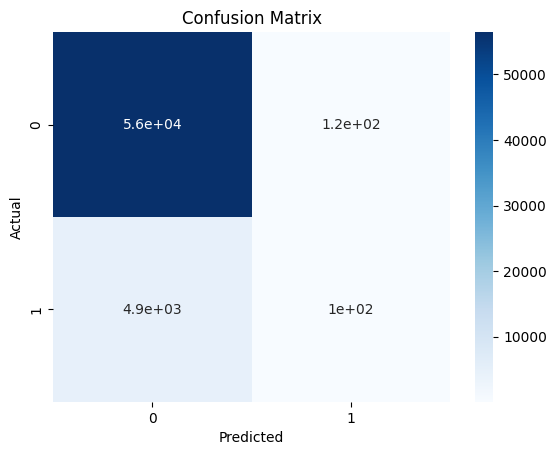

In [53]:
y_predxgb = modelxgb.predict(x_test)

cm = confusion_matrix(y_test, y_predxgb)

print("Confusion Matrix:")
print(cm)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
false_positives = cm[0, 1]
print("False Positives (FP):", false_positives)

false_negatives = cm[1, 0]
print("False Negatives (FN):", false_negatives)

False Positives (FP): 116
False Negatives (FN): 4862


# Top Feature

In [60]:
model = xgb.XGBClassifier()

In [62]:
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

feature_importances = model.feature_importances_

feature_importances_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

top_features = feature_importances_df.sort_values('Importance', ascending=False).head(10)

print("Top 10 Fitur Setelah Pemodelan:")
print(top_features)

Top 10 Fitur Setelah Pemodelan:
                        Feature  Importance
1                  EXT_SOURCE_3    0.094567
0                  EXT_SOURCE_2    0.068084
6                   CODE_GENDER    0.049955
33                 FLAG_OWN_CAR    0.047629
13              FLAG_DOCUMENT_3    0.045210
12       REG_CITY_NOT_LIVE_CITY    0.043217
25           NAME_CONTRACT_TYPE    0.042282
5           NAME_EDUCATION_TYPE    0.042216
3   REGION_RATING_CLIENT_W_CITY    0.032116
9              NAME_INCOME_TYPE    0.030476


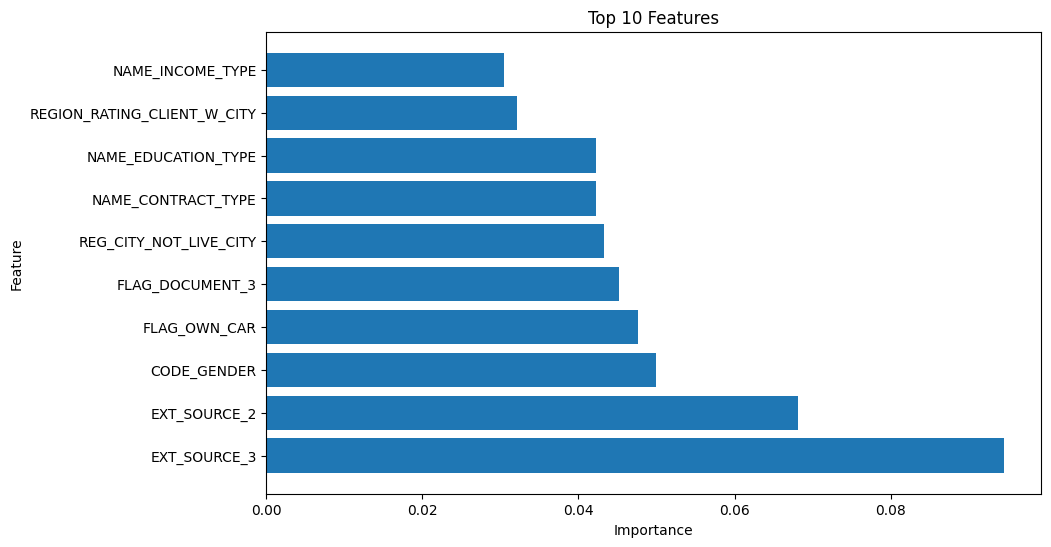

In [69]:
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features')
plt.show()

In [64]:
prediksi_target = modelxgb.predict(x_train) 

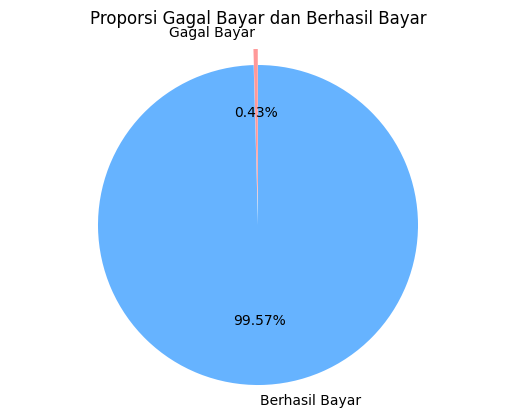

In [65]:
jumlah_gagal_bayar = (prediksi_target == 1).sum()
jumlah_berhasil_bayar = (prediksi_target == 0).sum()

presentase_gagal_bayar = (jumlah_gagal_bayar / len(prediksi_target)) * 100
presentase_berhasil_bayar = (jumlah_berhasil_bayar / len(prediksi_target)) * 100

labels = ['Gagal Bayar', 'Berhasil Bayar']
sizes = [presentase_gagal_bayar, presentase_berhasil_bayar]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title('Proporsi Gagal Bayar dan Berhasil Bayar')
plt.show()

In [57]:
jumlah_gagal_bayar

1065

# LGD

In [67]:
total_gagal_bayar_sebelum

24825

In [68]:
total_gagal_bayar_setelah

1065

In [66]:
total_gagal_bayar_sebelum = len(data[data['TARGET'] == 1])
total_data_sebelum = len(data)
LGD_sebelum = (total_gagal_bayar_sebelum / total_data_sebelum) * 100

prediksi_target = modelxgb.predict(x_train)
total_gagal_bayar_setelah = len(prediksi_target[prediksi_target == 1])
total_data_setelah = len(x_train)
LGD_setelah = (total_gagal_bayar_setelah / total_data_setelah) * 100

penurunan_LGD = LGD_sebelum - LGD_setelah
persentase_penurunan_LGD = (penurunan_LGD / LGD_sebelum) * 100

print("LGD sebelum pemodelan:", LGD_sebelum)
print("LGD setelah pemodelan:", LGD_setelah)
print("Penurunan LGD:", penurunan_LGD)
print("Persentase Penurunan LGD:", persentase_penurunan_LGD)


LGD sebelum pemodelan: 8.072881945686495
LGD setelah pemodelan: 0.43291275080485186
Penurunan LGD: 7.639969194881643
Persentase Penurunan LGD: 94.63744479706945
